In [1]:
import optical_gating_analysis as OG
import matplotlib.pyplot as plt
import numpy as np
import j_py_sad_correlation as jps
import tifffile as tf

In [2]:
source_folder = r"D:\Data\2012-06-20 13.34.11 vid 2x2 multi phase single plane"
data_src = source_folder + r"\brightfield\*tif"
frame_rate = 120

"""source_folder = r"D:\Data\2012-06-20 13.34.11 vid 2x2 multi phase single plane"
data_src = source_folder + r"\brightfield\*tif"
frame_rate = 80"""

'source_folder = r"D:\\Data\x812-06-20 13.34.11 vid 2x2 multi phase single plane"\ndata_src = source_folder + r"\x08rightfield\\*tif"\nframe_rate = 80'

In [3]:
print(data_src)

D:\Data\2012-06-20 13.34.11 vid 2x2 multi phase single plane\brightfield\*tif


In [4]:
oog = OG.BasicOpticalGating()
oog.sequence_manager.set_source(data_src)
oog.run()

Setting source to D:\Data\2012-06-20 13.34.11 vid 2x2 multi phase single plane\brightfield\*tif
Getting reference sequence
Getting SADs
Getting phases


In [5]:
order = np.argsort(oog.phases)
print(order)


[ 855  713 1103 ...  399  786  258]


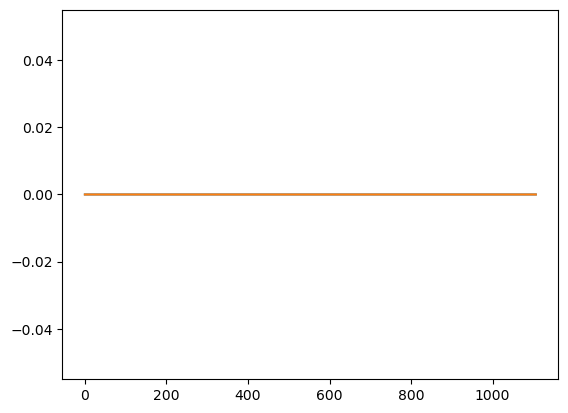

In [6]:
plt.plot(oog.drifts)

In [7]:
video_array = OG.SequenceManager.load_tif(data_src)

In [8]:
print(video_array.shape)

(1107, 230, 250)


In [9]:
drifts = np.array(oog.drifts)[order]

In [10]:
video_array = video_array[order]

In [11]:
print(np.max(drifts, axis = 0))

[0 0]


In [12]:
crop_x = np.max(np.abs(drifts))
crop_y = np.max(np.abs(drifts))
video_array_cropped = np.empty((video_array.shape[0], video_array.shape[1] - 2 * crop_x, video_array.shape[2] - 2 * crop_y), dtype = np.int16)
for i, drift in enumerate(drifts):
    dx, dy = drift
    rectF = [crop_x - dx, video_array[0].shape[0] - crop_x - dx, crop_y - dy, video_array[0].shape[1] - crop_y - dy]  # X1,X2,Y1,Y2
    video_array_cropped[i] = video_array[i][rectF[0] : rectF[1], rectF[2] : rectF[3]]

In [13]:
tf.imwrite(source_folder + r"\sorted.tif", np.array(video_array_cropped))

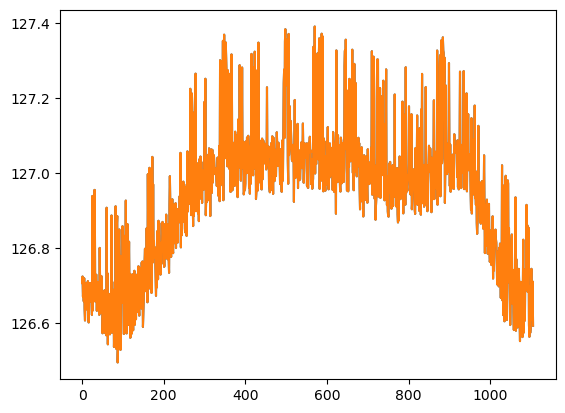

In [14]:
plt.plot(video_array_cropped.mean(axis=(1,2)))
plt.plot(video_array.mean(axis=(1,2)))

In [15]:
from numpy import dot
from numpy.linalg import norm

similarities = []

a = np.histogram(video_array_cropped[0].flatten(), bins = 30)[0]
for i in range(video_array_cropped.shape[0]):
    b = np.histogram(video_array_cropped[i].flatten(), bins = 30)[0]

    cos_sim = dot(a, b)/(norm(a)*norm(b))

    similarities.append(cos_sim)

print(similarities)

plt.figure(figsize = (10, 10))
plt.scatter(range(len(similarities)), similarities)
plt.show()

KeyboardInterrupt: 

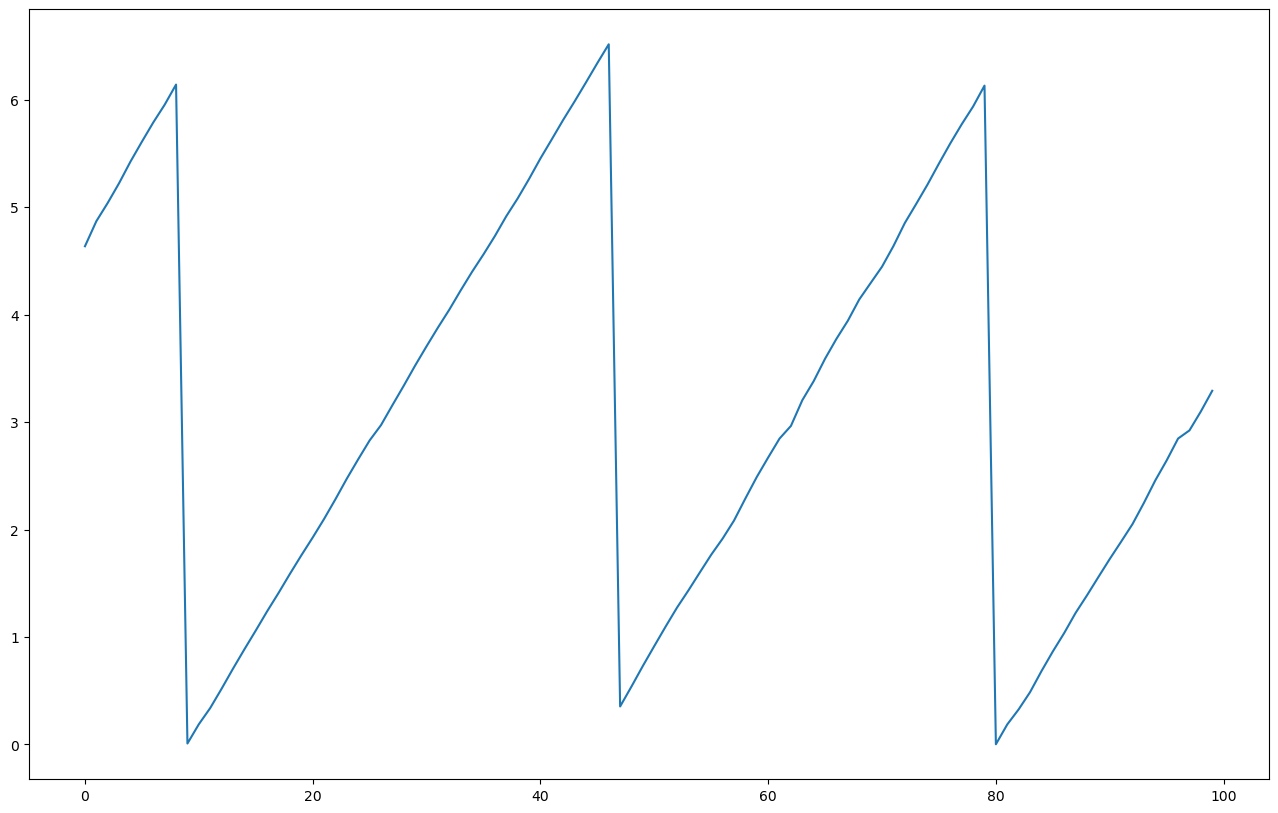

In [ ]:
plt.figure(figsize = (16,10))
plt.plot(range(len(oog.phases))[0:100], oog.phases[0:100])

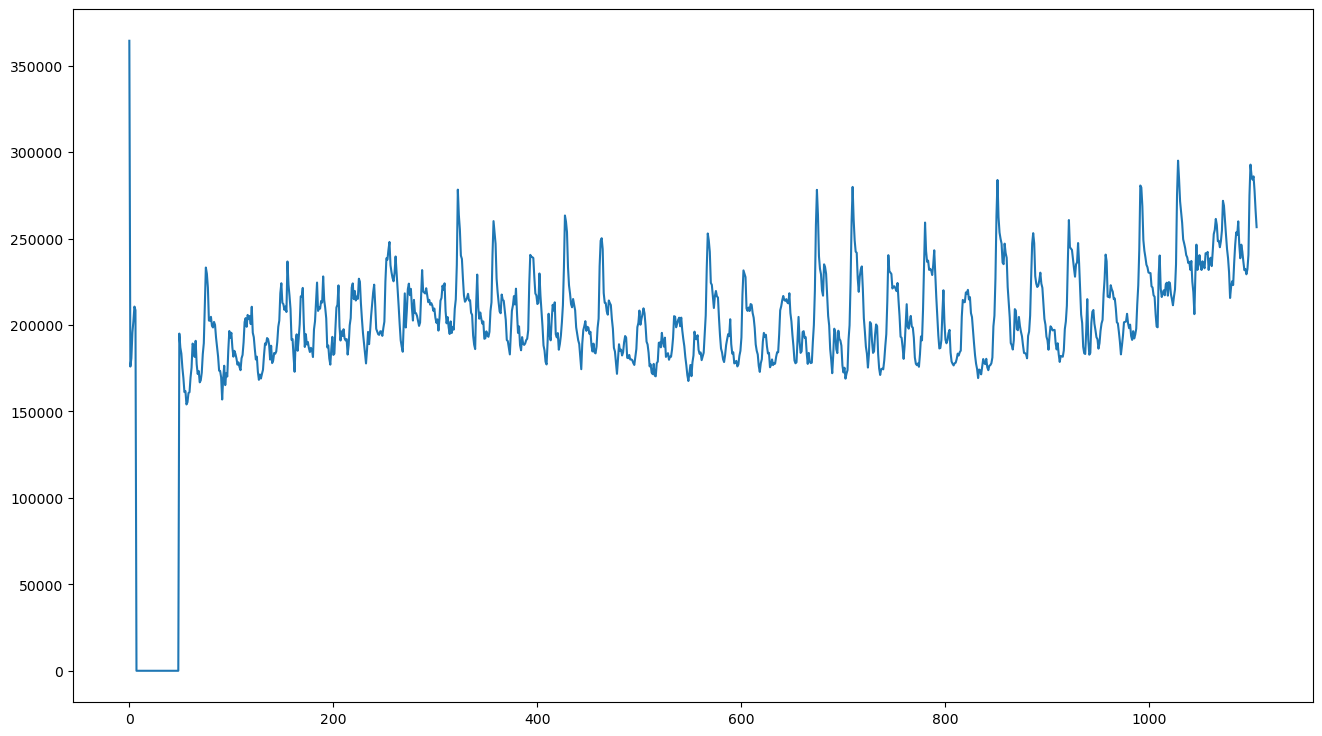

In [ ]:
plt.figure(figsize = (16,9))
plt.plot(np.min(oog.sads, axis=1))

In [ ]:
diffs = []
for i in range(1, video_array.shape[0]):
    diffs.append((np.sum(np.abs(video_array_cropped[i].astype(np.int32) - video_array_cropped[i-1].astype(np.int32)))) / video_array_cropped[i].shape[0])



In [ ]:
diffs_array = []
va = video_array_cropped[0:2000].astype(np.uint16)
for i in range(va.shape[0]):
    diffs_array.append(jps.sad_with_references(va[i], va))
diffs_array = np.array(diffs_array)


In [ ]:
diffs_array = np.delete(diffs_array,range(0,diffs_array.shape[0]**2,(diffs_array.shape[0]+1))).reshape(diffs_array.shape[0],(diffs_array.shape[1]-1))

In [ ]:
plt.figure(figsize = (100,100))
plt.imshow(diffs_array, interpolation="none")
plt.show()

[8, 50]
[1057, 15, 29, 46, 80, 109, 140, 171, 202, 234, 267, 300, 335, 367, 389, 421, 452, 482, 516, 540, 572, 597, 623, 653, 688, 718, 757, 789, 812, 842, 875, 904, 933, 965, 998, 1031, 1061, 1077, 1091, 51, 83, 113]


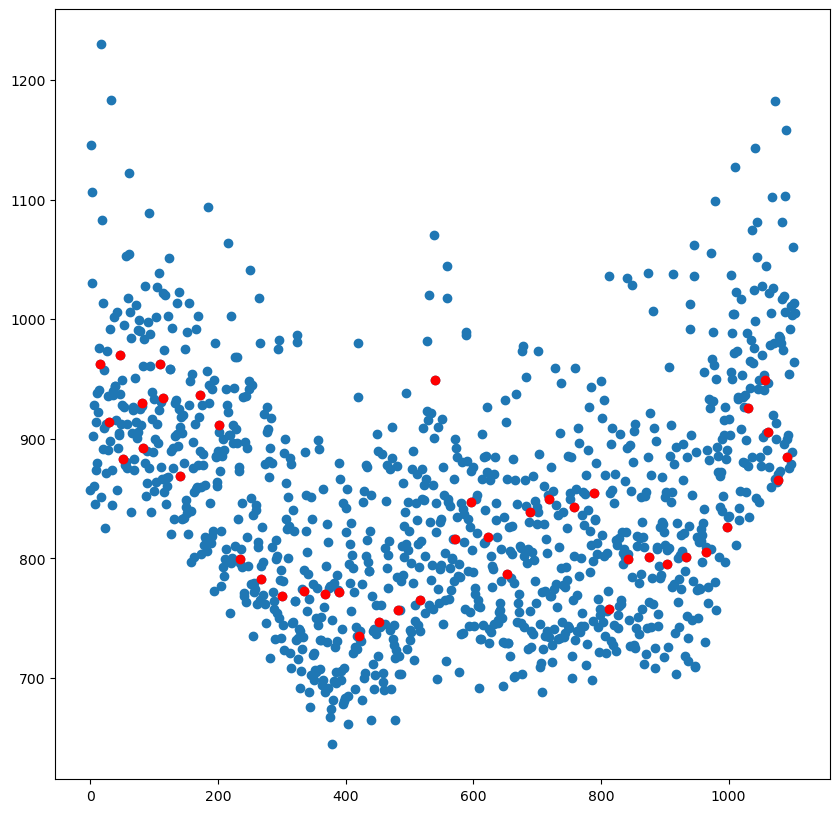

In [ ]:
plt.figure(figsize = (10,10))
plt.scatter(range(len(diffs)), diffs)

diffs_ref = []
for i in range(1, oog.sequence_manager.reference_sequence.shape[0]):
    diffs_ref.append((np.sum(np.abs(oog.sequence_manager.reference_sequence[i].astype(np.int32) - oog.sequence_manager.reference_sequence[i-1].astype(np.int32)))) / oog.sequence_manager.reference_sequence[i].shape[0])

print(oog.sequence_manager.reference_indices)

ref_indices = []
for i in range(len(order)):
    if i in range(oog.sequence_manager.reference_indices[0], oog.sequence_manager.reference_indices[1]):
        ref_indices.append(np.where(order == i)[0][0])
    

print(ref_indices)

plt.scatter(ref_indices, np.array(diffs)[ref_indices], c = "red")
plt.show()

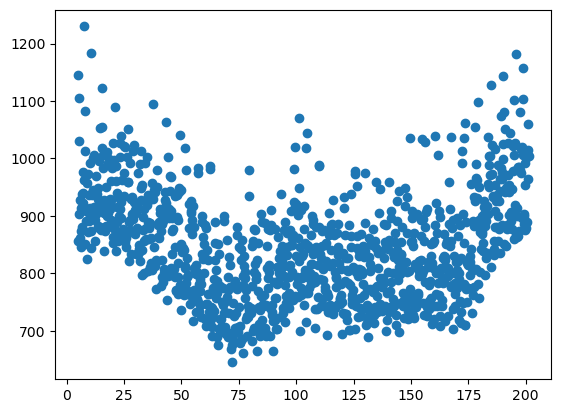

In [ ]:
plt.scatter(oog.unwrapped_phases[1::], diffs)
plt.show()

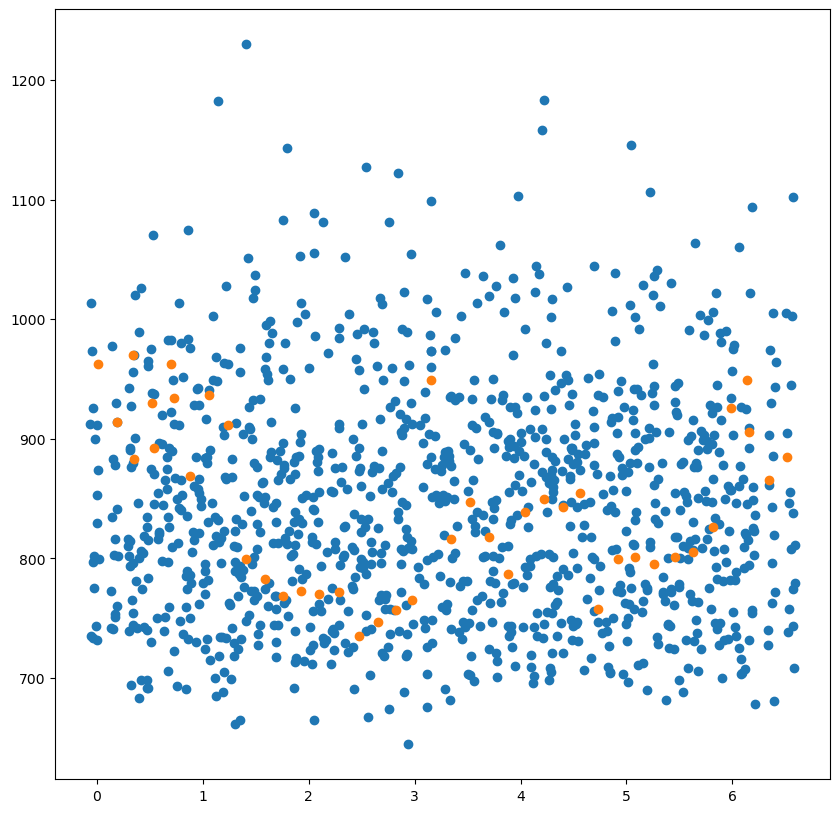

In [ ]:
plt.figure(figsize = (10,10))
plt.scatter(oog.phases[1::], diffs)
plt.scatter(oog.phases[range(oog.sequence_manager.reference_indices[0], oog.sequence_manager.reference_indices[1])], np.array(diffs)[ref_indices])

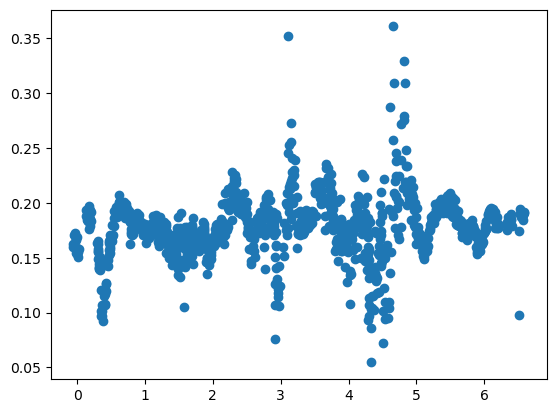

In [ ]:
plt.scatter(oog.phases[1::], oog.delta_phases)
plt.show()

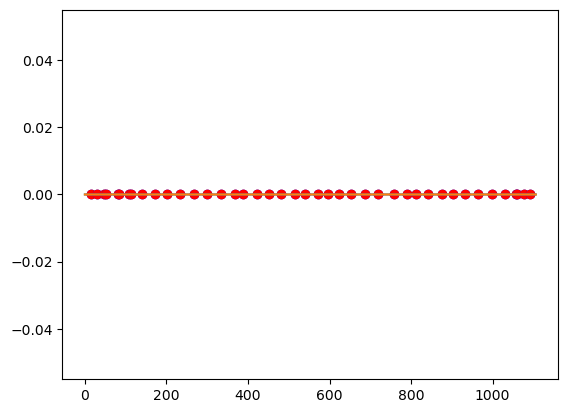

In [ ]:
plt.plot(range(len(oog.drifts)), oog.drifts)
for i in range(len(ref_indices)):
    plt.scatter(ref_indices[i], np.array(oog.drifts)[ref_indices[i]][0], c = "blue")
    plt.scatter(ref_indices[i], np.array(oog.drifts)[ref_indices[i]][1], c = "red")


In [ ]:
tf.imwrite(source_folder + r"\ref.tif", oog.sequence_manager.reference_sequence)